In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from IPython.display import display
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from scipy.stats import randint, uniform
from catboost import CatBoostRegressor, Pool

Running load_data()...
Running combine_data()...
Running create_features()...
Running data_overview()...

--- First few rows of combined data ---


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,filetype,Item_Identifier_Prefix,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FD,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NC,26



--- Data types and missing values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  filetype                   14204 non-null  object 
 13  Item_Id

None


--- Statistical summary of numerical features ---


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914,15.169319
std,4.652502,0.051459,62.086938,8.371664,1706.499616,8.371664
min,4.555000,0.000000,31.290000,1985.000000,33.290000,4.000000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400,9.000000
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000,14.000000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


Running analyze_missing_values()...

--- Missing values in combined data ---


,Count,Percent
Item_Outlet_Sales,5681,39.995776
Outlet_Size,4016,28.273726
Item_Weight,2439,17.171219


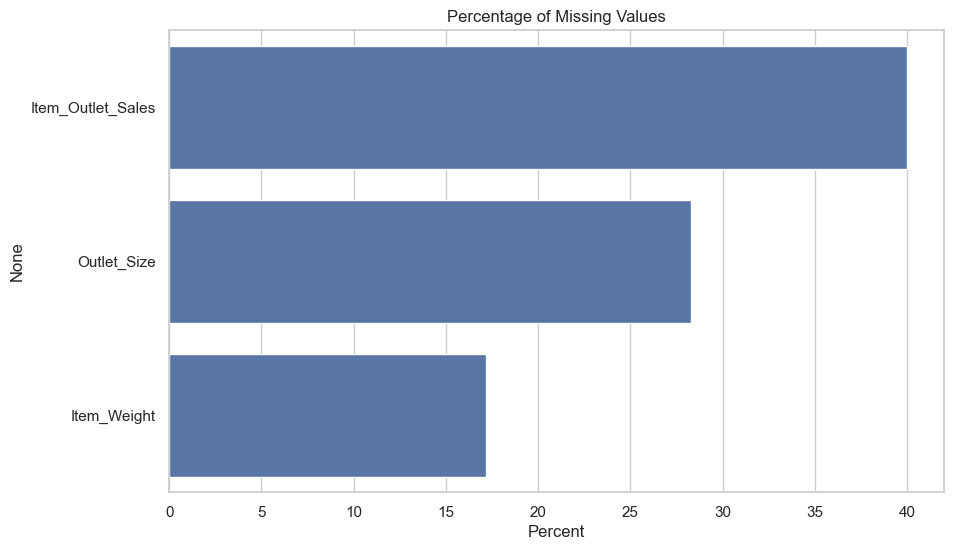

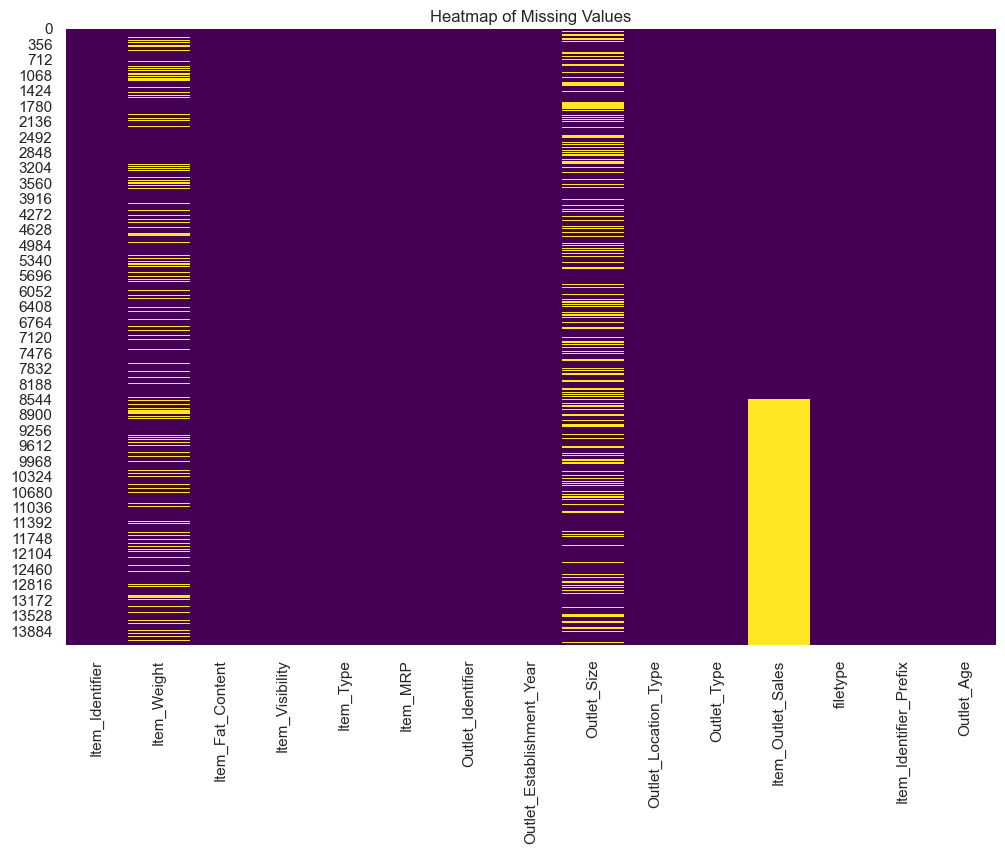

Running analyze_categorical_variables()...

--- Categorical Variables Analysis ---

Item_Fat_Content - Unique Values: 5
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64


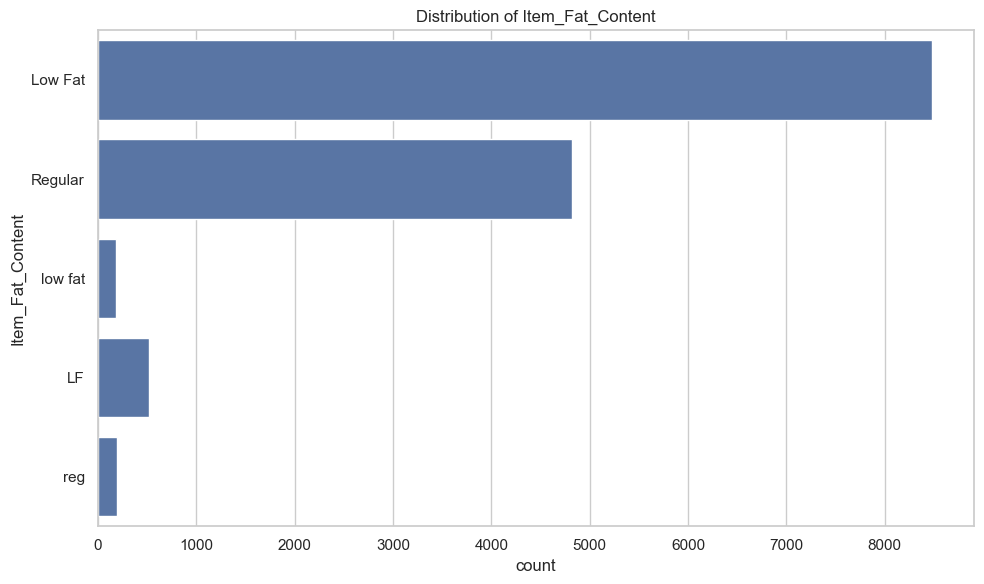


Item_Type - Unique Values: 16
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64


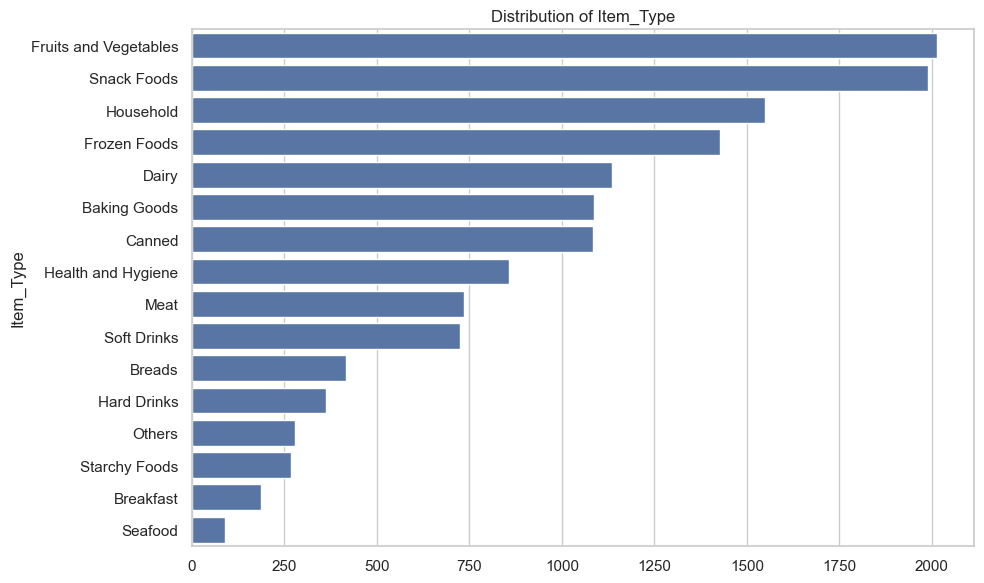


Outlet_Identifier - Unique Values: 10
Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64


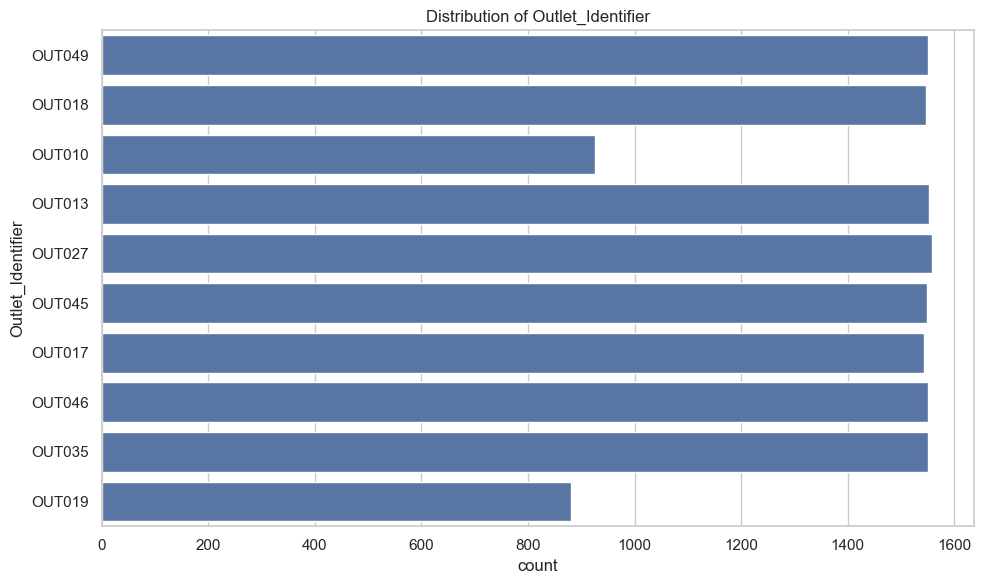


Outlet_Size - Unique Values: 3
Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: count, dtype: int64


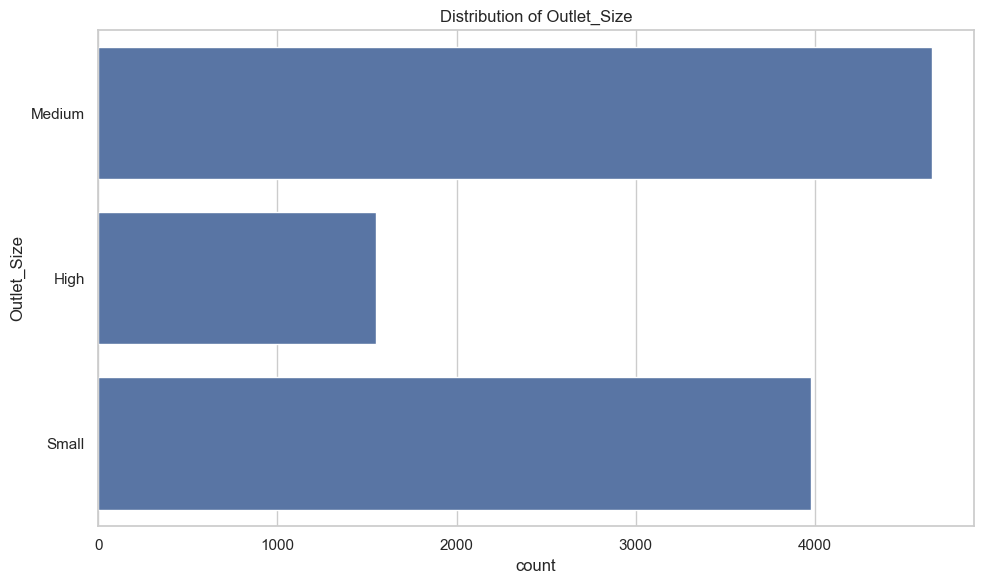


Outlet_Location_Type - Unique Values: 3
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64


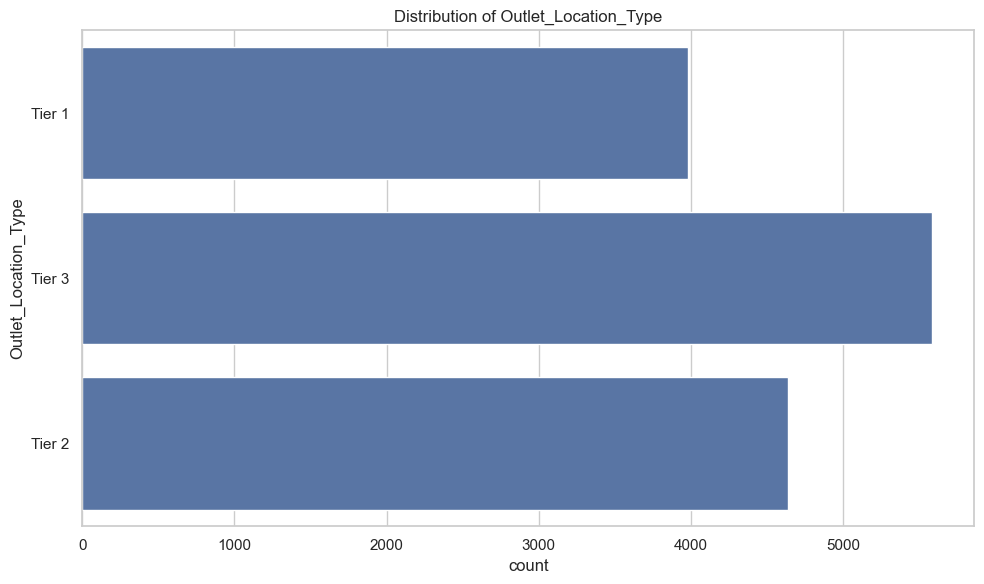


Outlet_Type - Unique Values: 4
Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64


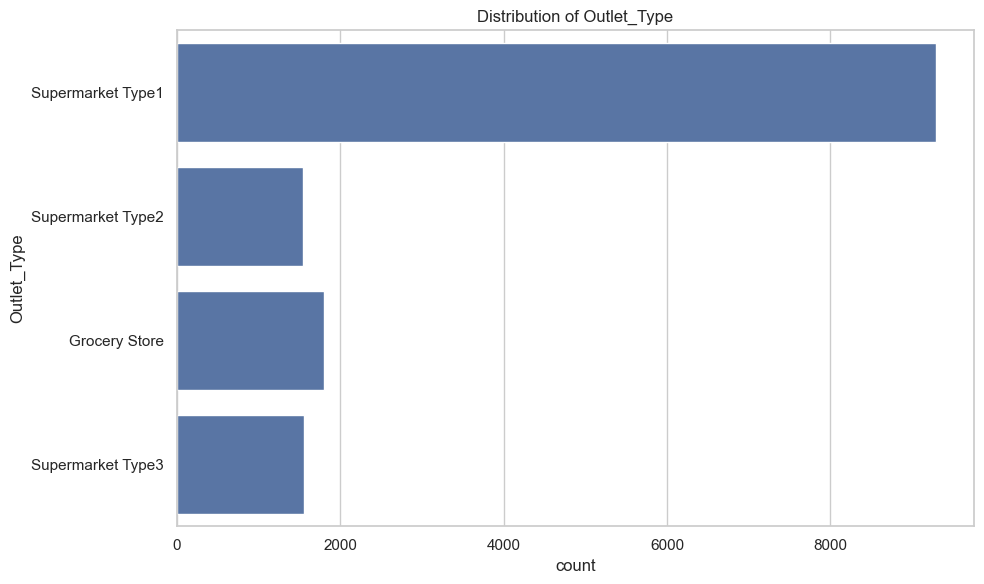

Running analyze_numerical_variables()...

--- Numerical Variables Analysis ---

Item_Weight - Missing: 2439
Min: 4.555, Max: 21.35
Mean: 12.792854228644284, Median: 12.6
Skewness: 0.10130935278560388


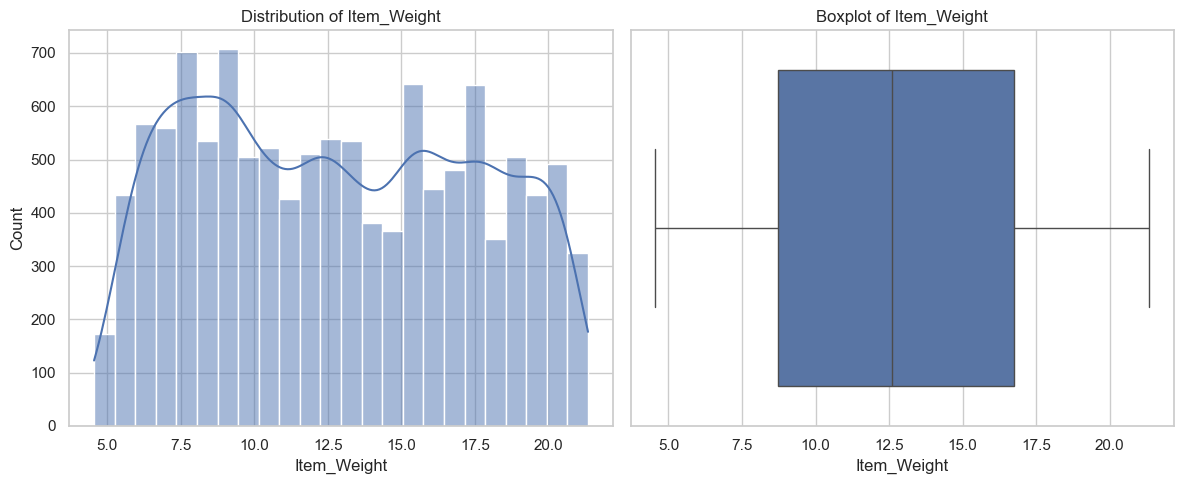


Item_Visibility - Missing: 0
Min: 0.0, Max: 0.328390948
Mean: 0.06595278007399324, Median: 0.054020536499999994
Skewness: 1.1951751774587882


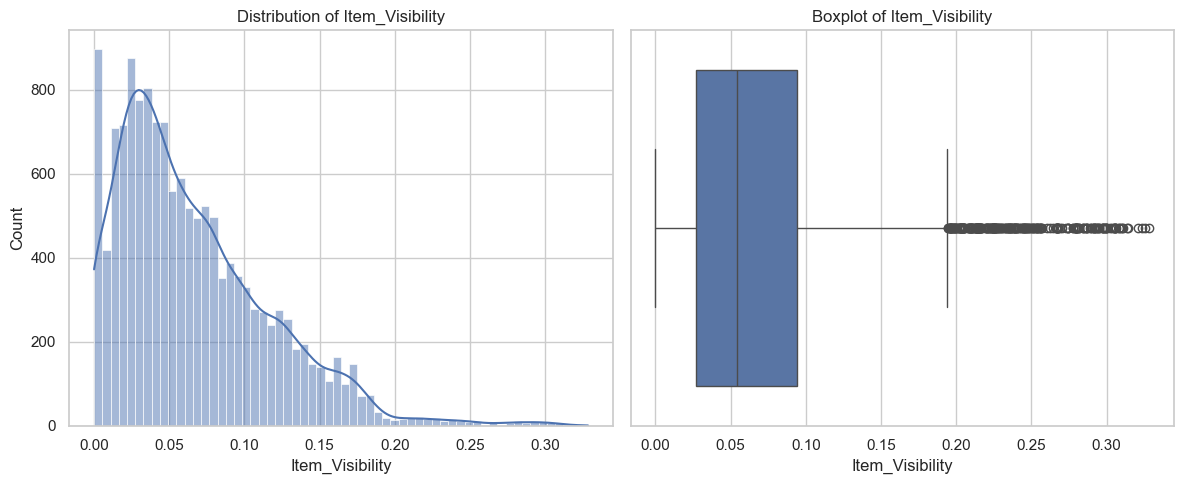


Item_MRP - Missing: 0
Min: 31.29, Max: 266.8884
Mean: 141.0049772599268, Median: 142.247
Skewness: 0.13072836040225866


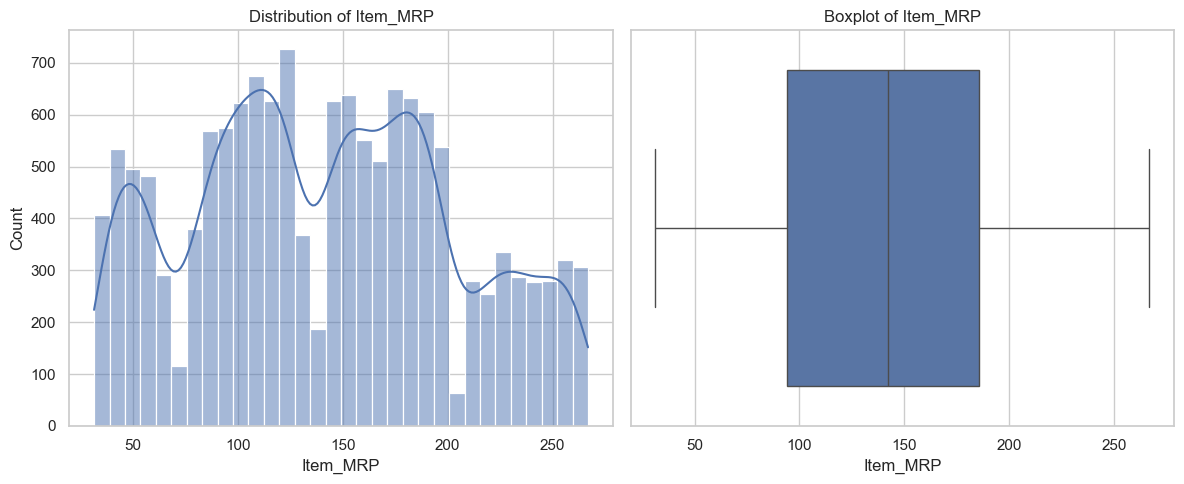


Outlet_Establishment_Year - Missing: 0
Min: 1985, Max: 2009
Mean: 1997.8306814981695, Median: 1999.0
Skewness: -0.39646519008637443


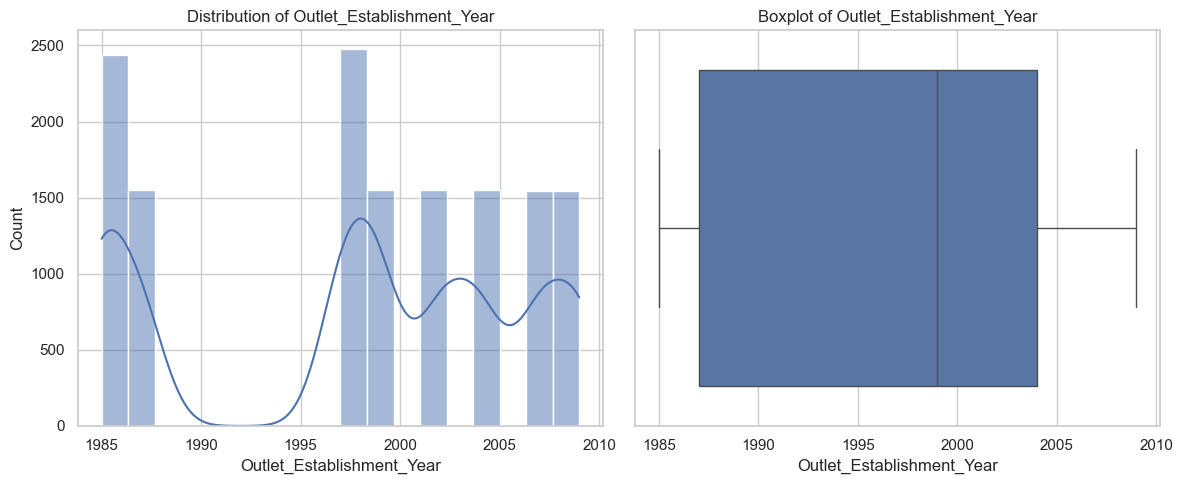


Outlet_Age - Missing: 0
Min: 4, Max: 28
Mean: 15.169318501830471, Median: 14.0
Skewness: 0.3964651900863859


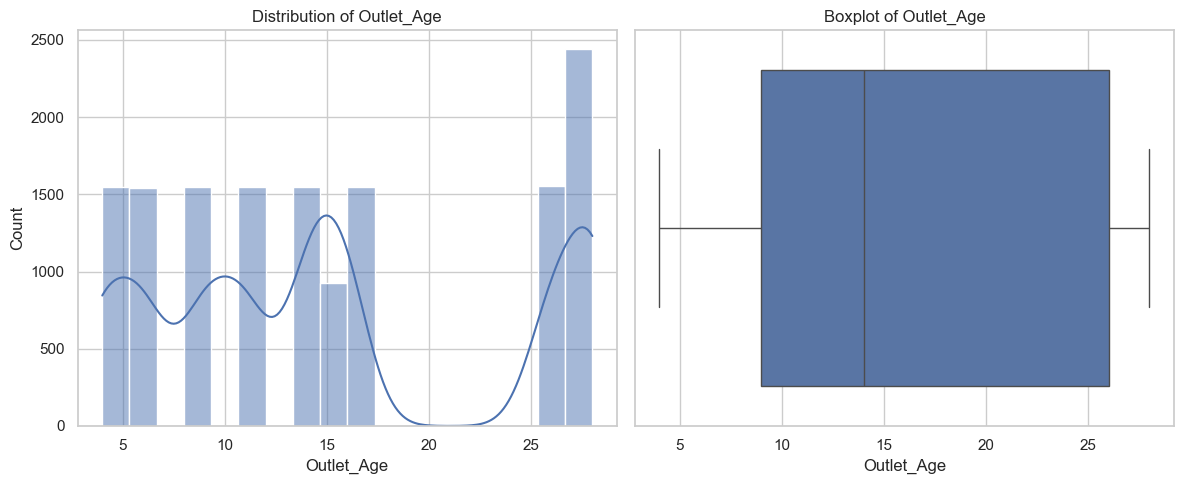

Running analyze_target_variable()...

--- Target Variable Analysis (TRAIN DATA ONLY) ---
Mean: 2181.288913575032, Median: 1794.331
Min: 33.29, Max: 13086.9648
Skewness: 1.1775306028542796


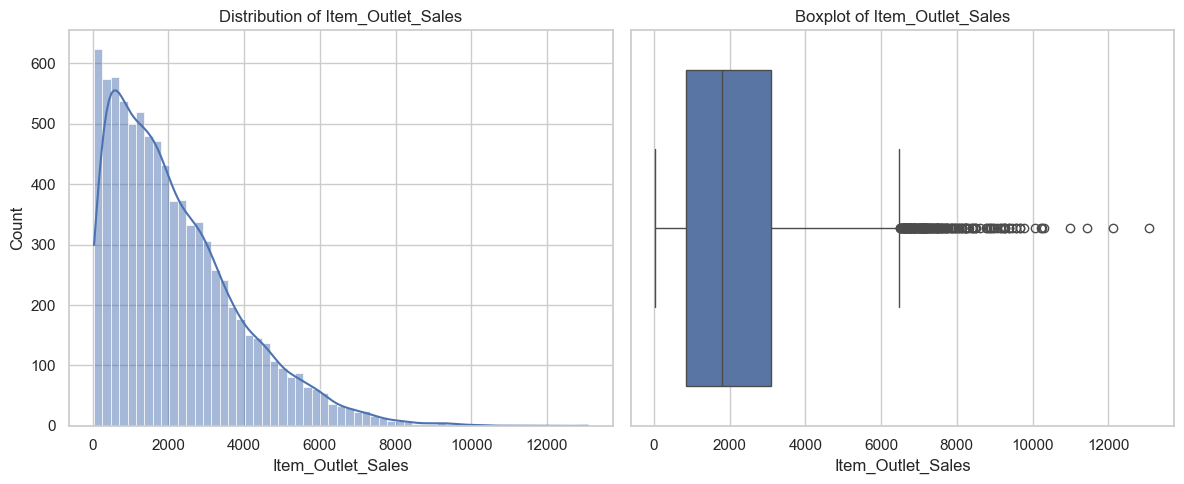

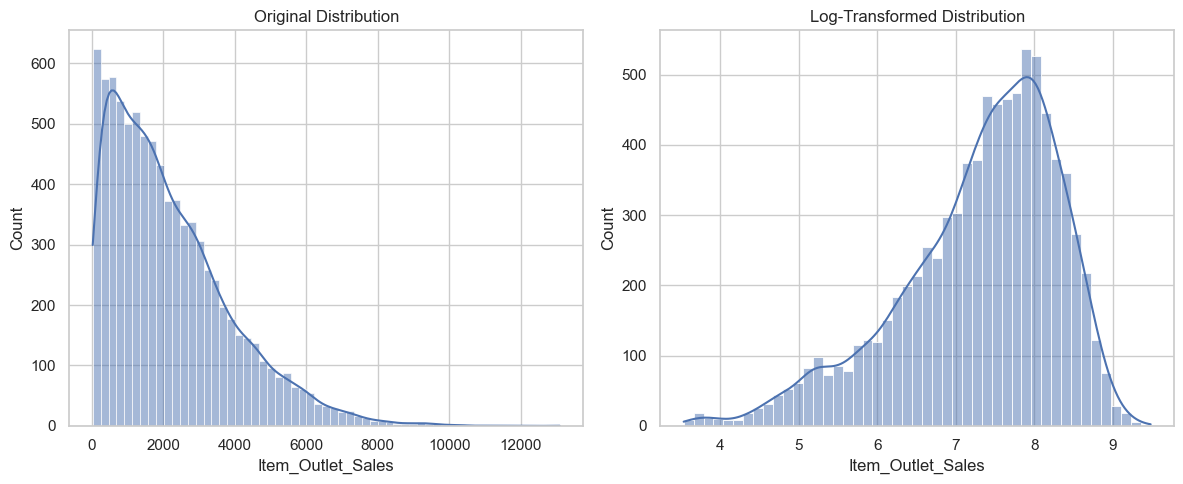

Running analyze_outliers()...

--- Outlier Analysis for Item_Outlet_Sales ---
Number of outliers: 186


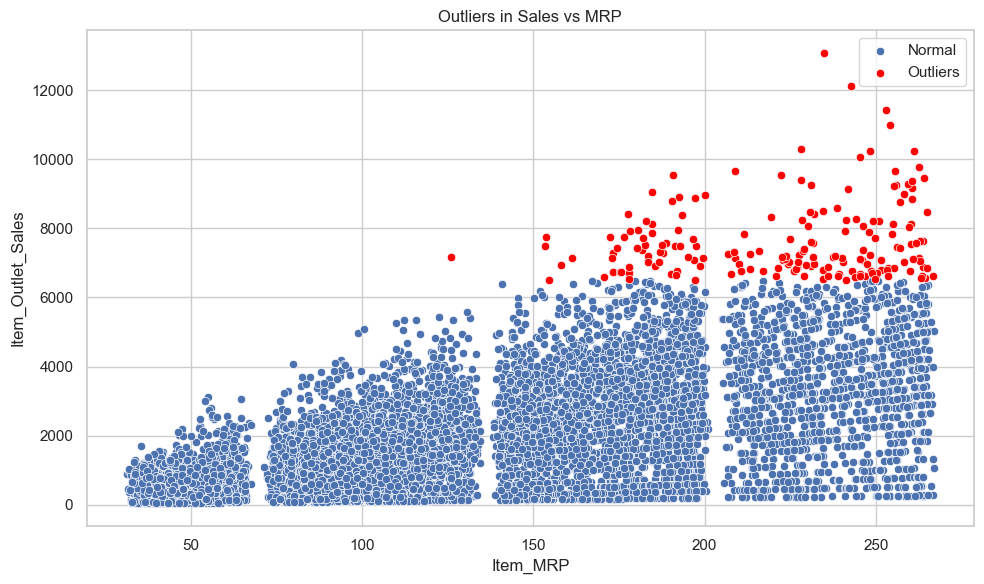

Running analyze_time_trends()...

--- Sales Trends by Outlet Establishment Year ---


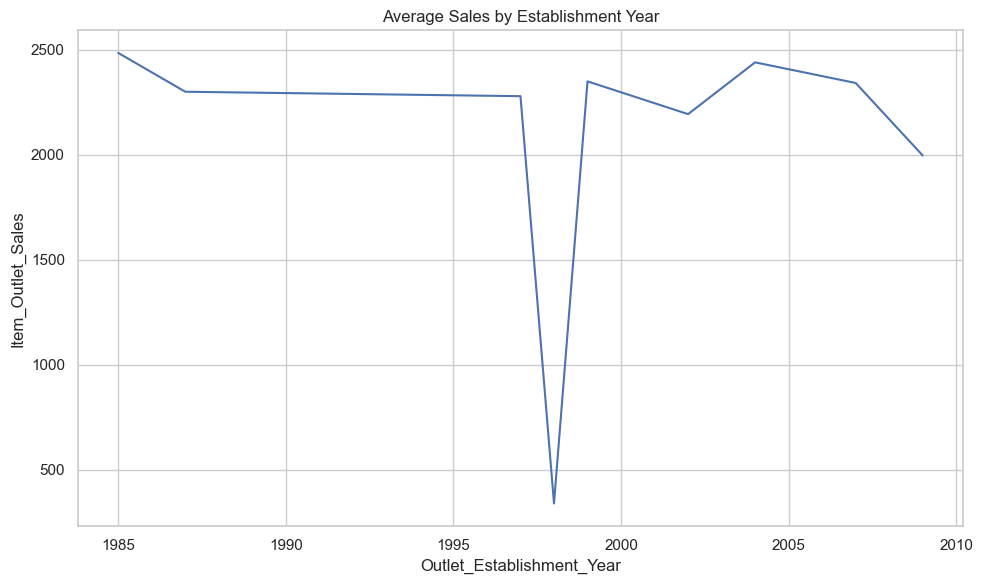

Running analyze_numerical_vs_target()...

--- Numerical vs Sales ---


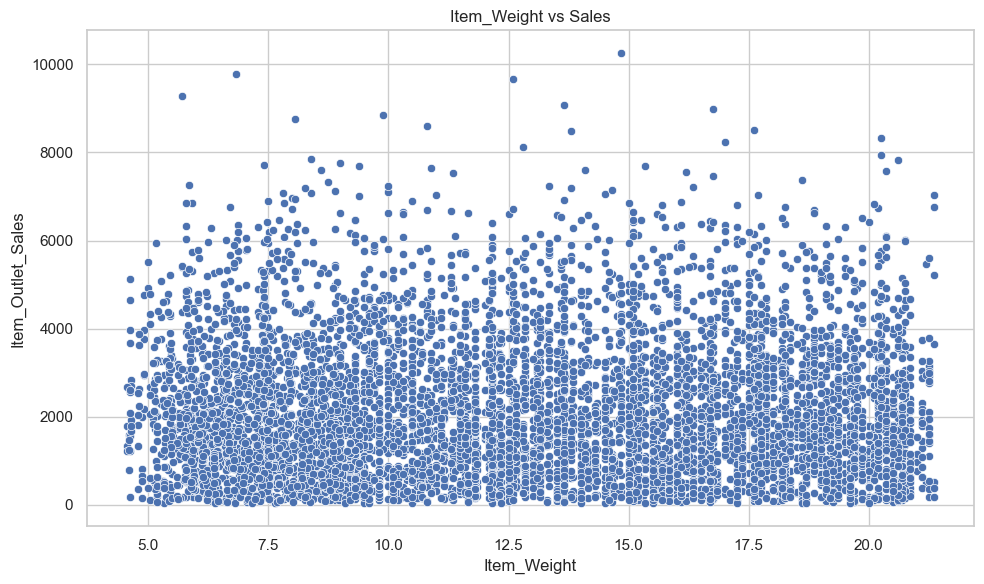

Correlation(Item_Weight, Sales): 0.0141


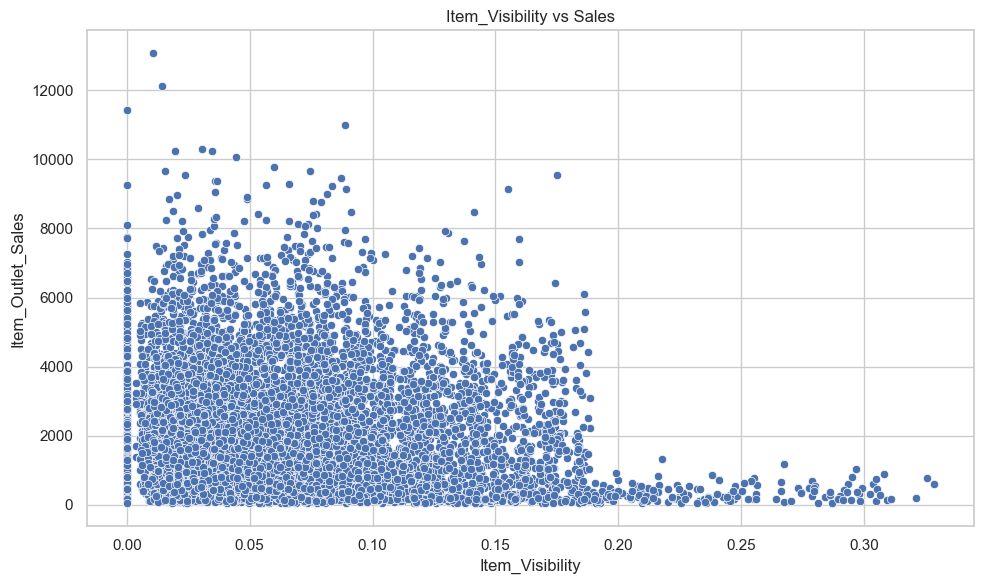

Correlation(Item_Visibility, Sales): -0.1286


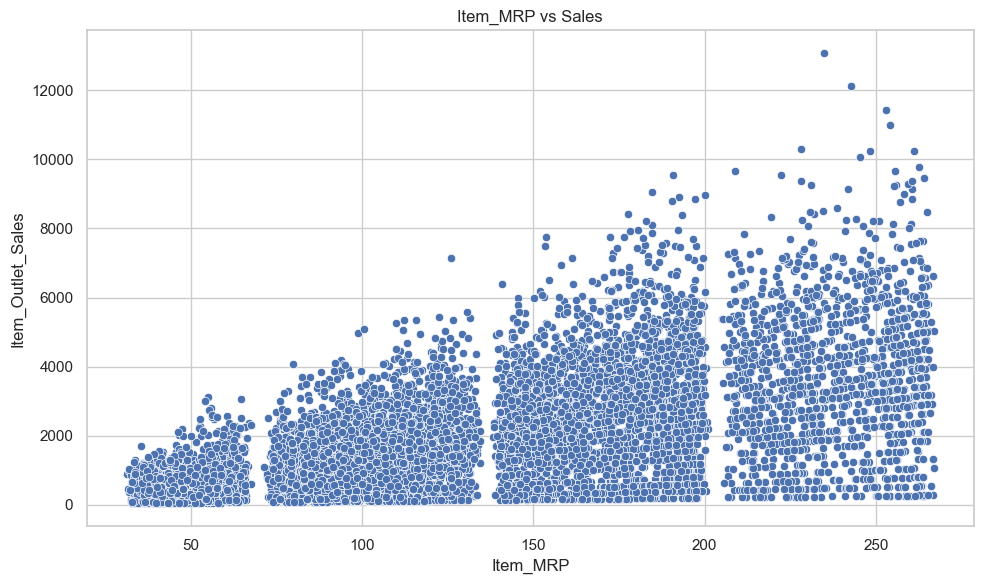

Correlation(Item_MRP, Sales): 0.5676


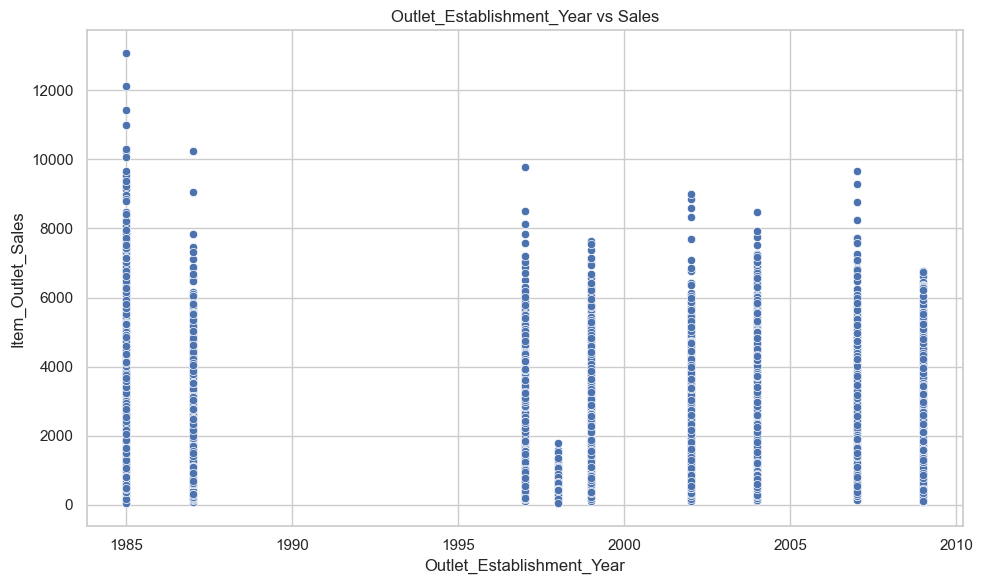

Correlation(Outlet_Establishment_Year, Sales): -0.0491


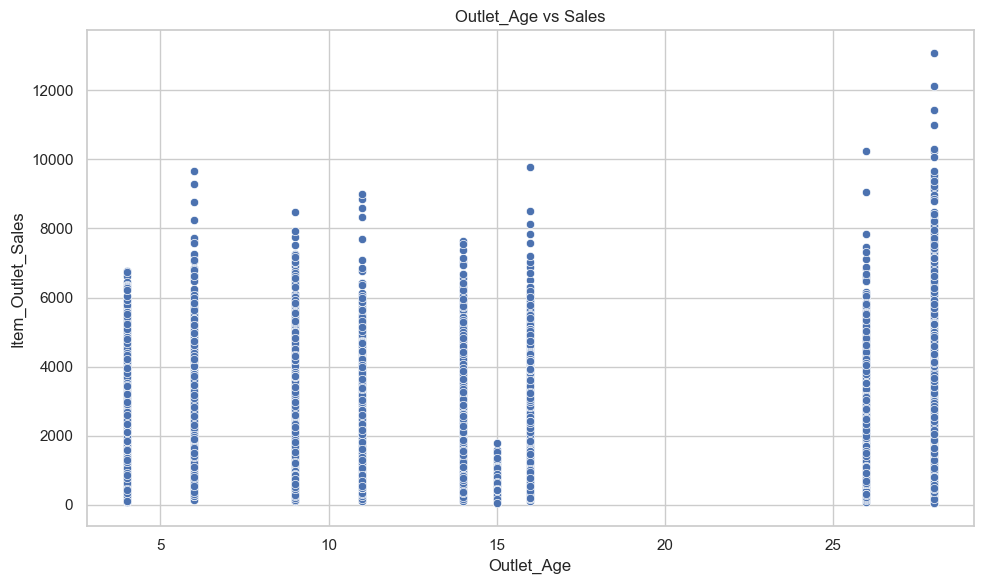

Correlation(Outlet_Age, Sales): 0.0491
Running analyze_numerical_pairplot()...

--- Pairplot ---


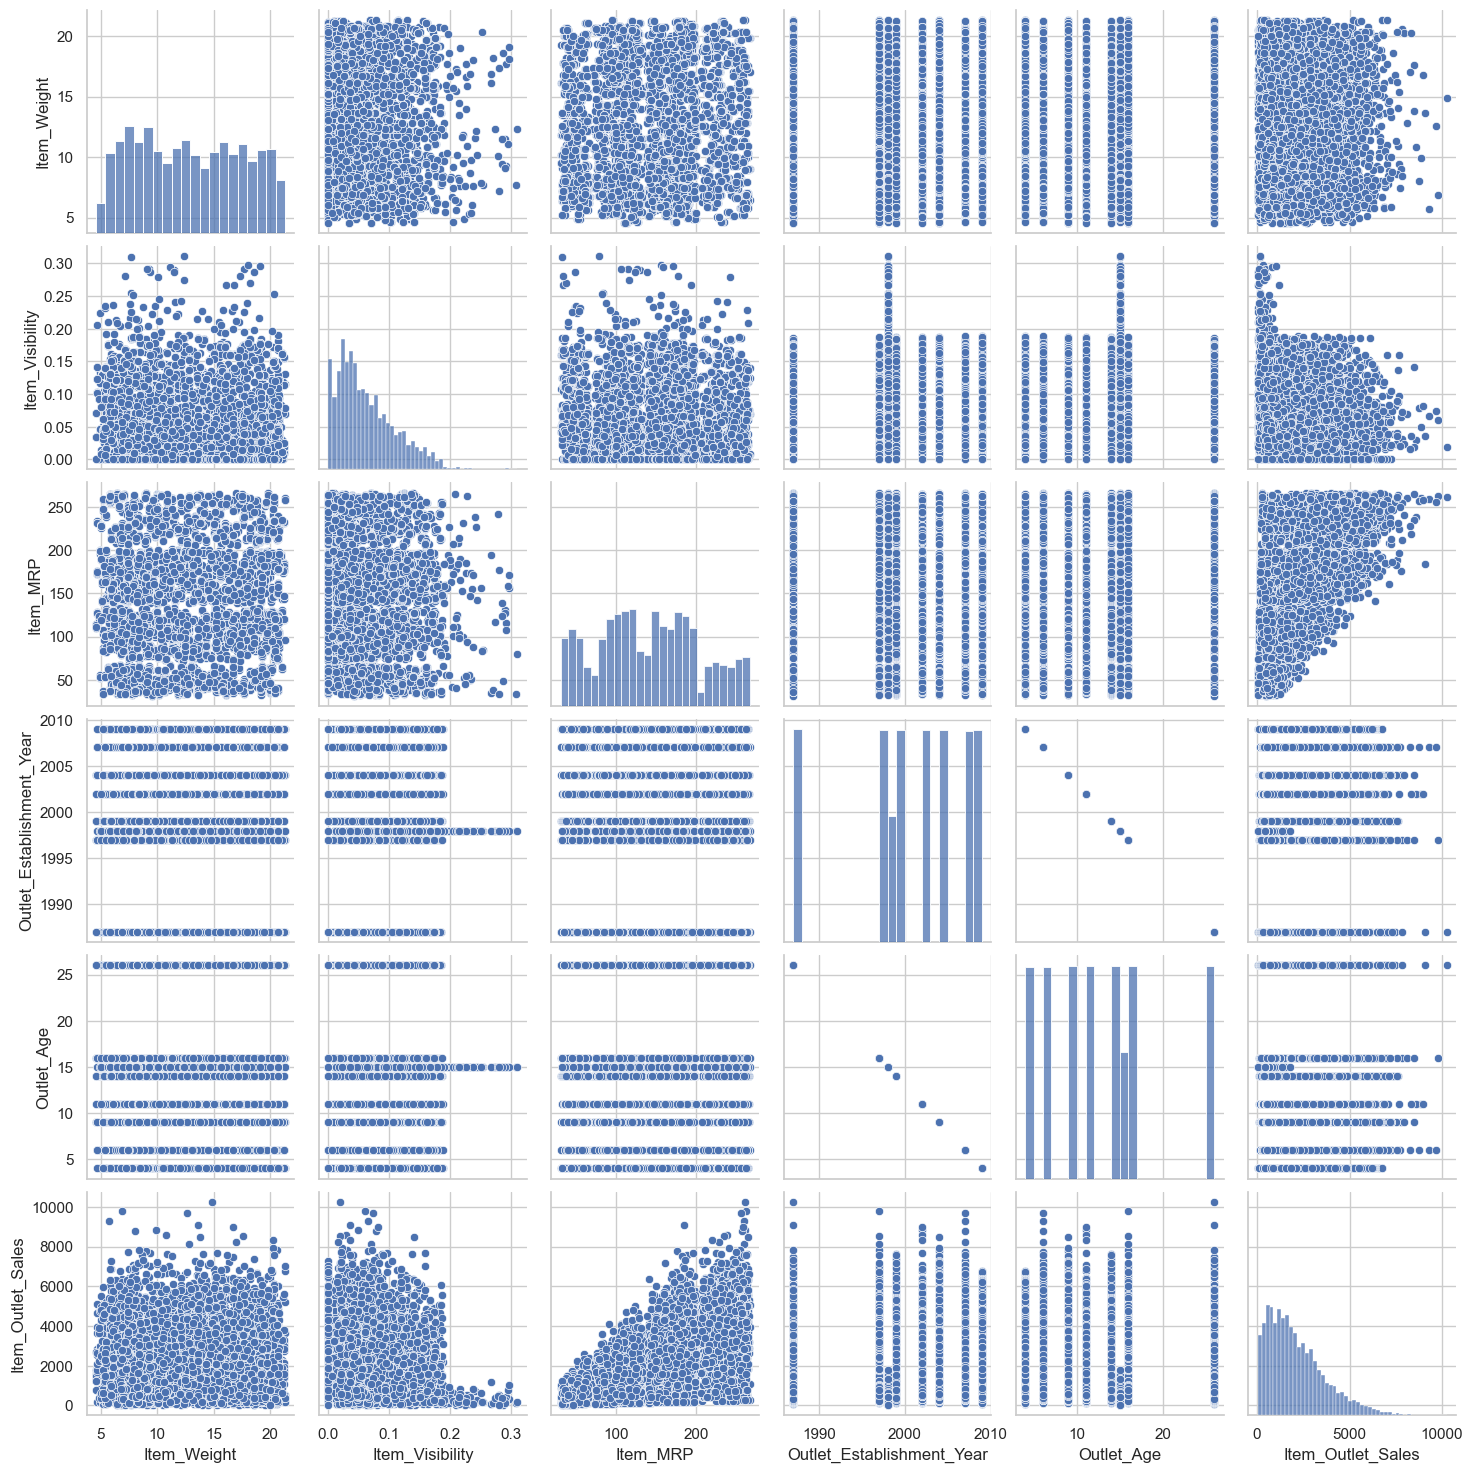

Running analyze_categorical_vs_target()...

--- Categorical vs Sales ---


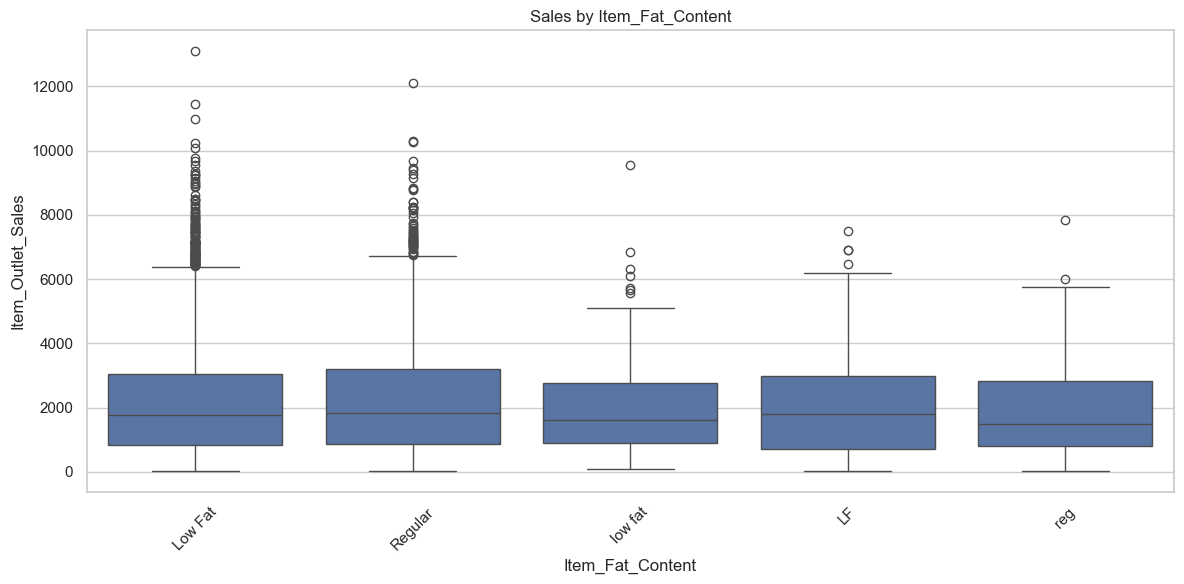

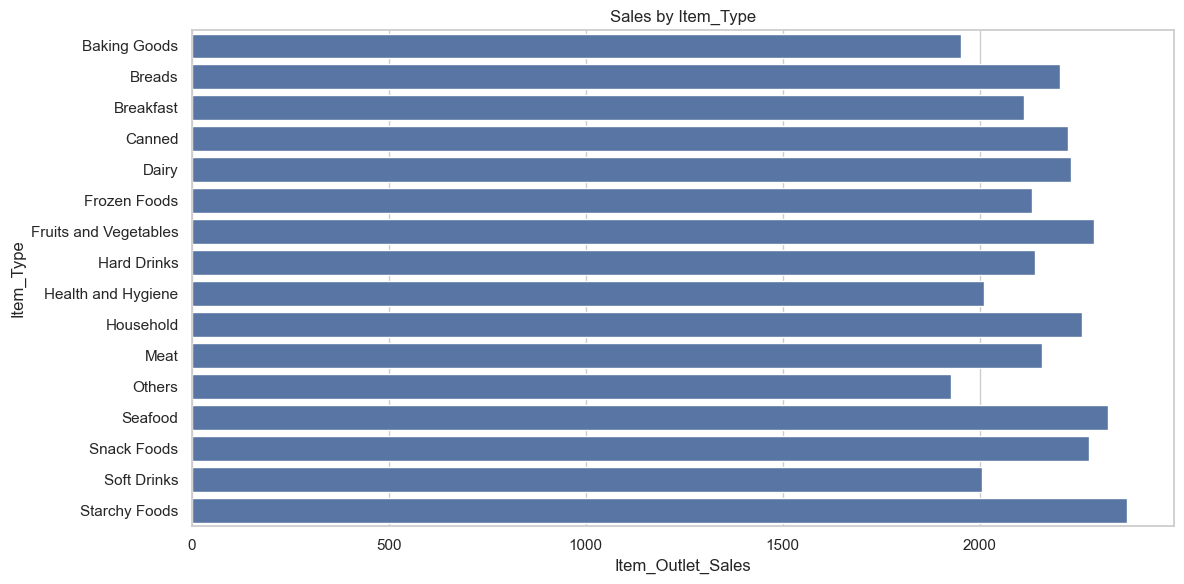

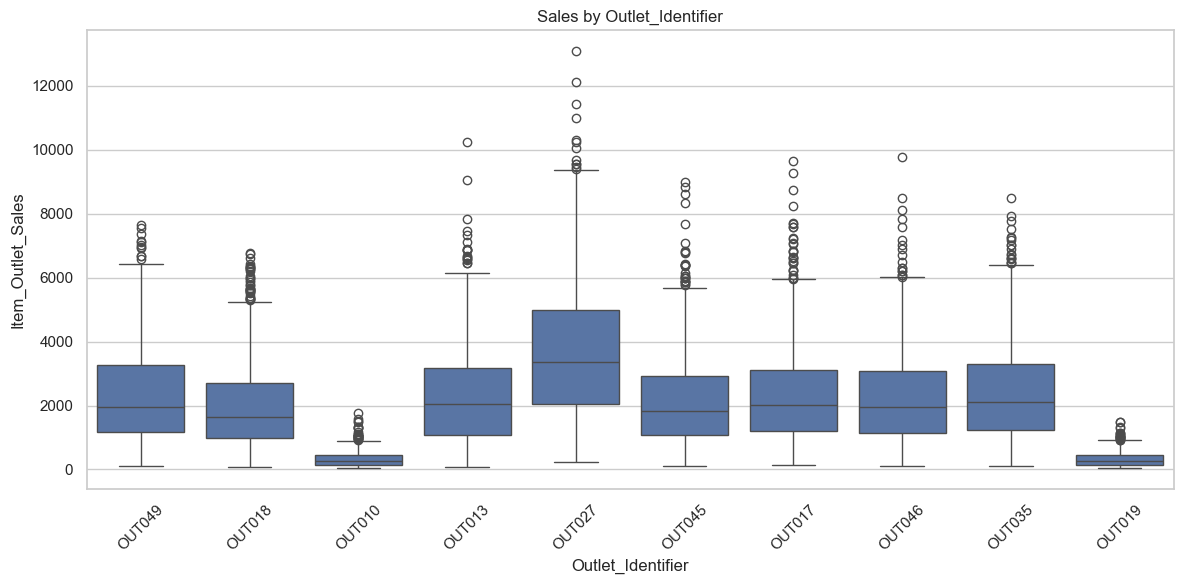

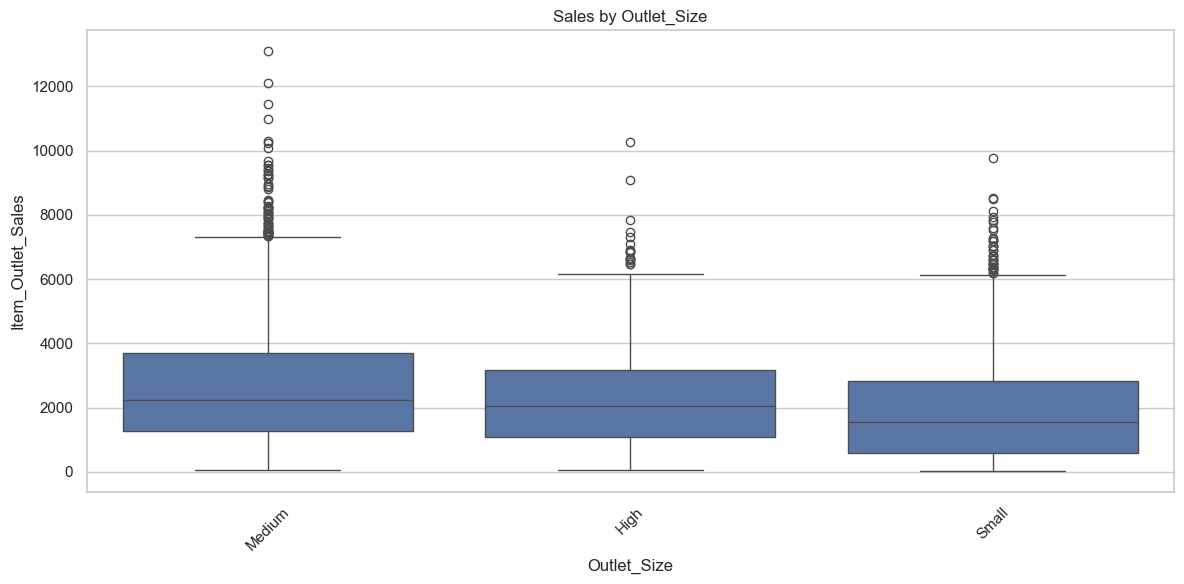

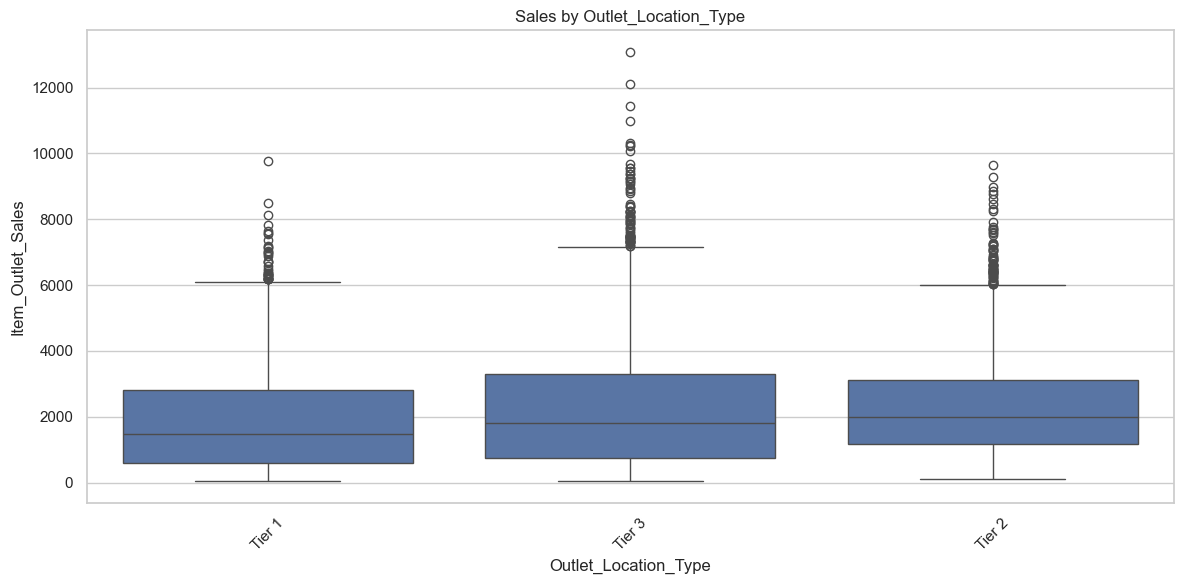

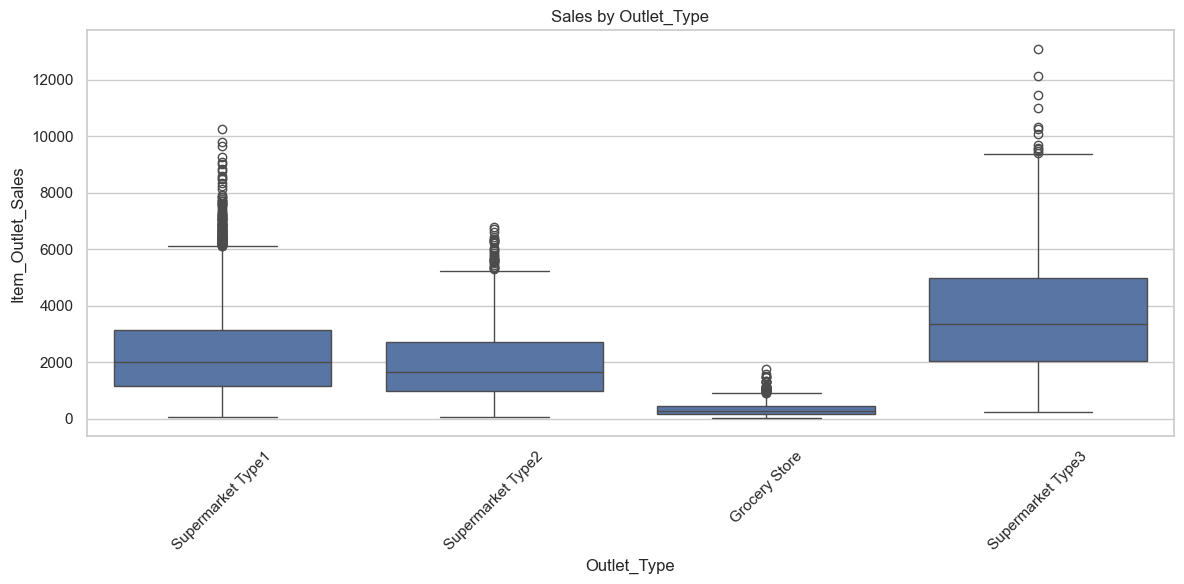

Running analyze_outlet_size_location()...

--- Outlet Size & Location vs Sales ---


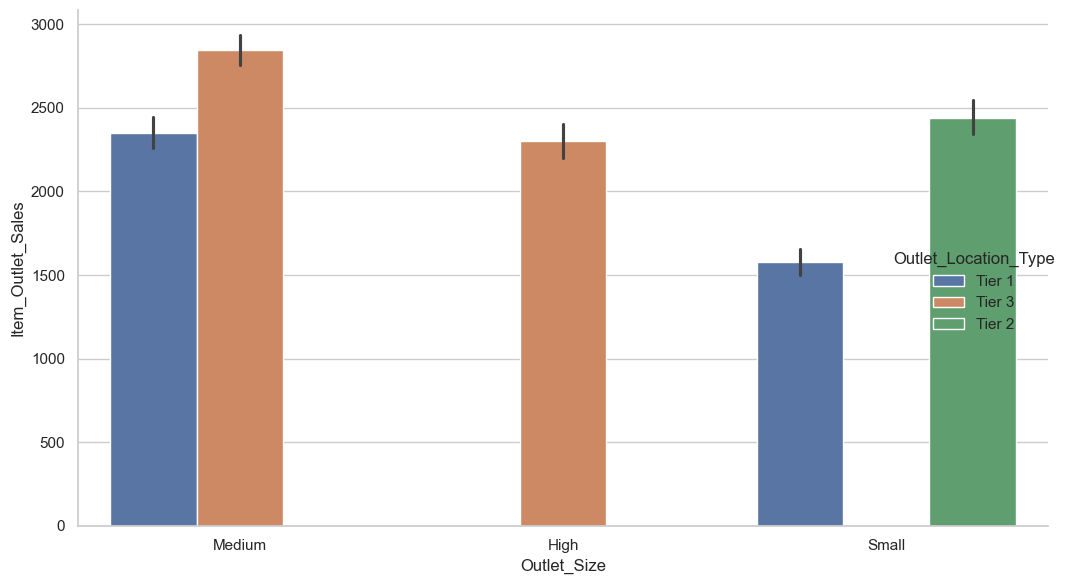

Running analyze_special_patterns()...

--- Special Patterns ---


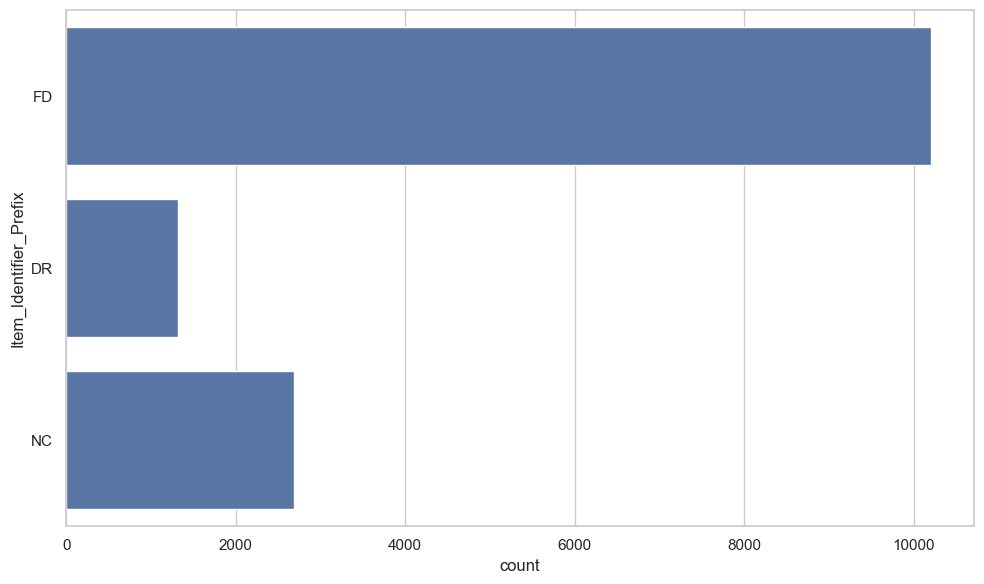

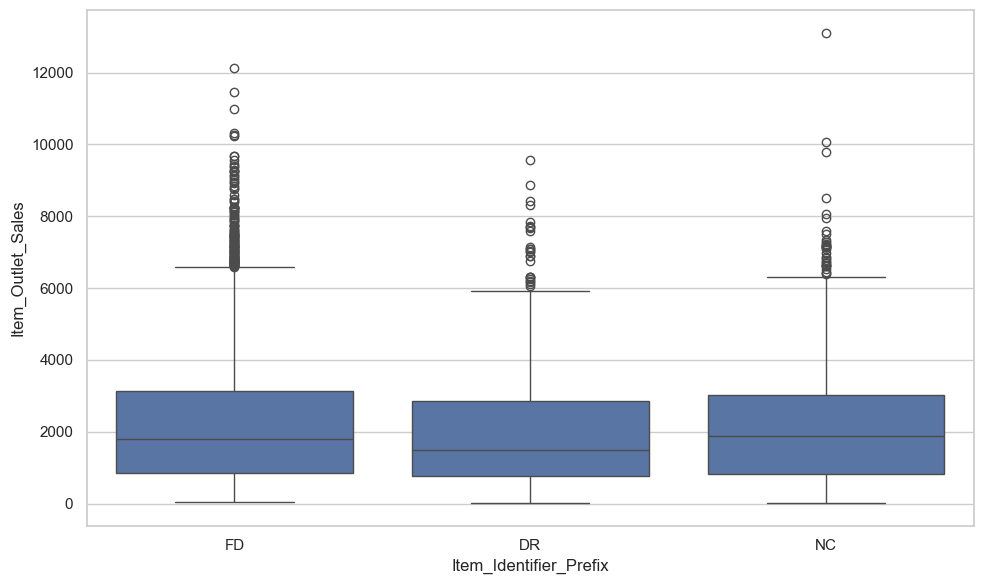

Running summarize_findings()...

=== SUMMARY OF KEY FINDINGS ===
Total records combined: 14204
Missing Item_Weight: 2439 (17.17%)
Zero visibility count: 879
Sales skewness: 1.18
PDF report saved to BigMart_EDA_Report.pdf


'BigMart_EDA_Report.pdf'

In [2]:
class BigMartEDA:
    """
    A class for performing Exploratory Data Analysis on the BigMart Sales dataset
    and exporting both figures and a compiled PDF report.
    """

    def __init__(self, train_path, test_path, output_dir='figures'):
        plt.style.use('ggplot')
        sns.set_theme(style="whitegrid")
        plt.rcParams['figure.figsize'] = (12, 8)
        plt.rcParams['font.size'] = 12
        warnings.filterwarnings('ignore')

        self.train_path = train_path
        self.test_path = test_path
        self.output_dir = output_dir
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        self.train = None
        self.test = None
        self.combined = None
        self.train_data = None

        self.categorical_cols = [
            'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
        ]
        self.numerical_cols = [
            'Item_Weight', 'Item_Visibility', 'Item_MRP',
            'Outlet_Establishment_Year', 'Outlet_Age'
        ]

    def load_data(self):
        self.train = pd.read_csv(self.train_path)
        self.test = pd.read_csv(self.test_path)
        return self

    def combine_data(self):
        self.train['filetype'] = 'train'
        self.test['filetype'] = 'test'
        self.test['Item_Outlet_Sales'] = np.nan
        self.combined = pd.concat([self.train, self.test], axis=0).reset_index(drop=True)
        return self

    def create_features(self):
        self.combined['Item_Identifier_Prefix'] = self.combined['Item_Identifier'].str[:2]
        self.combined['Outlet_Age'] = 2013 - self.combined['Outlet_Establishment_Year']
        self.train_data = self.combined[self.combined['filetype']=='train'].copy()
        return self

    def data_overview(self):
        print("\n--- First few rows of combined data ---")
        display(self.combined.head())
        print("\n--- Data types and missing values ---")
        display(self.combined.info())
        print("\n--- Statistical summary of numerical features ---")
        display(self.combined.describe())
        return self

    def analyze_missing_values(self):
        print("\n--- Missing values in combined data ---")
        missing_values = self.combined.isnull().sum().sort_values(ascending=False)
        missing_percent = (missing_values / len(self.combined)) * 100
        missing_data = pd.concat([missing_values, missing_percent], axis=1)
        missing_data.columns = ['Count', 'Percent']
        display(missing_data[missing_data['Count']>0])

        plt.figure(figsize=(10,6))
        sns.barplot(y=missing_data[missing_data['Count']>0].index,
                    x='Percent', data=missing_data[missing_data['Count']>0].reset_index())
        plt.title('Percentage of Missing Values')
        plt.savefig(f"{self.output_dir}/missing_values.png")
        plt.show()

        plt.figure(figsize=(12,8))
        sns.heatmap(self.combined.isnull(), cbar=False, cmap='viridis')
        plt.title('Heatmap of Missing Values')
        plt.savefig(f"{self.output_dir}/missing_values_heatmap.png")
        plt.show()
        return self

    def analyze_categorical_variables(self):
        print("\n--- Categorical Variables Analysis ---")
        for col in self.categorical_cols:
            print(f"\n{col} - Unique Values: {self.combined[col].nunique()}")
            print(self.combined[col].value_counts(dropna=False))
            plt.figure(figsize=(10,6))
            if self.combined[col].nunique()>10:
                counts = self.combined[col].value_counts()
                sns.barplot(y=counts.index, x=counts.values)
            else:
                sns.countplot(y=col, data=self.combined)
            plt.title(f'Distribution of {col}')
            plt.tight_layout()
            plt.savefig(f"{self.output_dir}/cat_{col}.png")
            plt.show()
        return self

    def analyze_numerical_variables(self):
        print("\n--- Numerical Variables Analysis ---")
        for col in self.numerical_cols:
            print(f"\n{col} - Missing: {self.combined[col].isnull().sum()}")
            print(f"Min: {self.combined[col].min()}, Max: {self.combined[col].max()}")
            print(f"Mean: {self.combined[col].mean()}, Median: {self.combined[col].median()}")
            print(f"Skewness: {self.combined[col].skew()}")
            plt.figure(figsize=(12,5))
            plt.subplot(1,2,1)
            sns.histplot(self.combined[col].dropna(), kde=True)
            plt.title(f'Distribution of {col}')
            plt.subplot(1,2,2)
            sns.boxplot(x=self.combined[col].dropna())
            plt.title(f'Boxplot of {col}')
            plt.tight_layout()
            plt.savefig(f"{self.output_dir}/num_{col}.png")
            plt.show()
        return self

    def analyze_target_variable(self):
        print("\n--- Target Variable Analysis (TRAIN DATA ONLY) ---")
        target = self.train_data['Item_Outlet_Sales']
        print(f"Mean: {target.mean()}, Median: {target.median()}")
        print(f"Min: {target.min()}, Max: {target.max()}")
        print(f"Skewness: {target.skew()}")
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        sns.histplot(target, kde=True)
        plt.title('Distribution of Item_Outlet_Sales')
        plt.subplot(1,2,2)
        sns.boxplot(x=target)
        plt.title('Boxplot of Item_Outlet_Sales')
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/target_distribution.png")
        plt.show()
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        sns.histplot(target, kde=True)
        plt.title('Original Distribution')
        plt.subplot(1,2,2)
        sns.histplot(np.log1p(target), kde=True)
        plt.title('Log-Transformed Distribution')
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/target_log_transform.png")
        plt.show()
        return self

    def analyze_outliers(self):
        print("\n--- Outlier Analysis for Item_Outlet_Sales ---")
        Q1 = self.train_data['Item_Outlet_Sales'].quantile(0.25)
        Q3 = self.train_data['Item_Outlet_Sales'].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        outliers = self.train_data[(self.train_data['Item_Outlet_Sales']<lower)|
                                   (self.train_data['Item_Outlet_Sales']>upper)]
        print(f"Number of outliers: {len(outliers)}")
        plt.figure(figsize=(10,6))
        sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=self.train_data, label='Normal')
        sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=outliers, color='red', label='Outliers')
        plt.title('Outliers in Sales vs MRP')
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/outliers_sales_vs_mrp.png")
        plt.show()
        return self

    def analyze_time_trends(self):
        print("\n--- Sales Trends by Outlet Establishment Year ---")
        plt.figure(figsize=(10,6))
        sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales',
                     data=self.train_data, estimator='mean', ci=None)
        plt.title('Average Sales by Establishment Year')
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/sales_by_year.png")
        plt.show()
        return self

    def analyze_numerical_vs_target(self):
        print("\n--- Numerical vs Sales ---")
        for col in self.numerical_cols:
            plt.figure(figsize=(10,6))
            sns.scatterplot(x=col, y='Item_Outlet_Sales', data=self.train_data)
            plt.title(f'{col} vs Sales')
            plt.tight_layout()
            plt.savefig(f"{self.output_dir}/scatter_{col}.png")
            plt.show()
            print(f"Correlation({col}, Sales): {self.train_data[col].corr(self.train_data['Item_Outlet_Sales']):.4f}")
        return self

    def analyze_numerical_pairplot(self):
        print("\n--- Pairplot ---")
        cols = self.numerical_cols + ['Item_Outlet_Sales']
        sns.pairplot(self.train_data[cols].dropna())
        plt.savefig(f"{self.output_dir}/pairplot.png")
        plt.show()
        return self

    def analyze_categorical_vs_target(self):
        print("\n--- Categorical vs Sales ---")
        for col in self.categorical_cols:
            plt.figure(figsize=(12,6))
            if self.train_data[col].nunique()>10:
                stats_df = self.train_data.groupby(col)['Item_Outlet_Sales'].mean().reset_index()
                sns.barplot(x='Item_Outlet_Sales', y=col, data=stats_df)
            else:
                sns.boxplot(x=col, y='Item_Outlet_Sales', data=self.train_data)
                plt.xticks(rotation=45)
            plt.title(f'Sales by {col}')
            plt.tight_layout()
            plt.savefig(f"{self.output_dir}/cat_{col}_vs_sales.png")
            plt.show()
        return self

    def analyze_outlet_size_location(self):
        print("\n--- Outlet Size & Location vs Sales ---")
        sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Location_Type',
                    kind='bar', data=self.train_data, height=6, aspect=1.5)
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/size_location_vs_sales.png")
        plt.show()
        return self

    def analyze_special_patterns(self):
        print("\n--- Special Patterns ---")
        # Item category prefix
        plt.figure(figsize=(10,6))
        sns.countplot(y='Item_Identifier_Prefix', data=self.combined)
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/prefix_distribution.png")

        # Sales by prefix
        plt.figure(figsize=(10,6))
        sns.boxplot(x='Item_Identifier_Prefix', y='Item_Outlet_Sales', data=self.train_data)
        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/prefix_vs_sales.png")
        plt.show()
        return self

    def summarize_findings(self):
        print("\n=== SUMMARY OF KEY FINDINGS ===")
        print(f"Total records combined: {len(self.combined)}")
        mv = self.combined.isnull().sum()
        print(f"Missing Item_Weight: {mv['Item_Weight']} ({mv['Item_Weight']/len(self.combined)*100:.2f}%)")
        print(f"Zero visibility count: {(self.combined['Item_Visibility']==0).sum()}")
        print(f"Sales skewness: {self.train_data['Item_Outlet_Sales'].skew():.2f}")
        return self

    def run_full_eda(self):
        steps = [
            'load_data', 'combine_data', 'create_features', 'data_overview',
            'analyze_missing_values', 'analyze_categorical_variables', 'analyze_numerical_variables',
            'analyze_target_variable', 'analyze_outliers', 'analyze_time_trends',
            'analyze_numerical_vs_target', 'analyze_numerical_pairplot', 'analyze_categorical_vs_target',
            'analyze_outlet_size_location', 'analyze_special_patterns', 'summarize_findings'
        ]
        for method in steps:
            if hasattr(self, method):
                print(f"Running {method}()...")
                getattr(self, method)()
            else:
                print(f"Skipping {method}: not implemented.")
        return self

    def save_pdf_report(self, pdf_path='BigMart_EDA_Report.pdf'):
        fig_files = sorted([
            os.path.join(self.output_dir, f) for f in os.listdir(self.output_dir)
            if f.lower().endswith('.png')
        ])
        with PdfPages(pdf_path) as pdf:
            for fig_file in fig_files:
                img = plt.imread(fig_file)
                plt.figure(figsize=(8,6))
                plt.axis('off')
                plt.imshow(img)
                pdf.savefig(bbox_inches='tight')
                plt.close()
        print(f"PDF report saved to {pdf_path}")
        return pdf_path


eda = BigMartEDA('train_v9rqX0R.csv', 'test_AbJTz2l.csv')
eda.run_full_eda()
eda.save_pdf_report('BigMart_EDA_Report.pdf')

# Retail Sales Data Analysis

## Executive Summary

This report analyzes retail sales data across various dimensions including product categories, outlet characteristics, and item attributes. The analysis reveals important patterns in sales distribution, product performance, and outlet effectiveness that can inform strategic business decisions.

## Distribution Analysis

### Sales Distribution
The sales data exhibits a right-skewed distribution with most items having lower sales values and fewer items having exceptionally high sales (pages 51-52). This pattern is typical in retail environments and suggests that:

- The majority of products sell in modest quantities (evident in histogram on page 51)
- A small number of high-performing products drive significant revenue (visible as outliers in boxplot on page 51)
- The log-transformed distribution appears more normally distributed (page 52), suggesting a multiplicative rather than additive effect on sales

### Distribution by Item Categories
The dataset contains three main item identifier prefixes (as shown on page 21):
- **FD**: Largest category with approximately 10,000 items
- **NC**: Medium-sized category with around 2,500 items
- **DR**: Smallest category with approximately 1,250 items

Sales performance across these categories appears relatively consistent (page 22 and page 37), indicating no strong correlation between item category and sales volume.

## Item Attribute Analysis

### Fat Content Categories
Five fat content categories are present in the data (page 1):
- Low Fat
- Regular
- low fat
- LF
- reg

The first chart (page 1) indicates some inconsistency in labeling (lowercase vs. uppercase variants), with "Low Fat" being the most common category followed by "Regular". This suggests a need for data standardization.

### Item Types
Sixteen distinct item types were identified (page 4), with the most common being:
1. Fruits and Vegetables
2. Snack Foods
3. Household items
4. Frozen Foods
5. Dairy

The sales by item type indicate (pages 5-6):
- Most categories maintain similar average sales (page 6)
- Some niche categories like Seafood and Meat show high average sales despite lower volume (page 23)
- Starchy Foods, Fruits and Vegetables, and Dairy products show strong performance across outlets (page 23 heatmap)

### MRP (Maximum Retail Price) Analysis
- MRP values range from approximately 30 to 270 (page 27)
- The distribution shows clustering around specific price points (50, 100, 150, 200, 250) as visible in the histogram on page 27
- There's a positive correlation between item MRP and sales (r = 0.57 according to the correlation matrix on page 19)
- Higher-priced items generally generate higher sales volumes, particularly items priced above 150 (pages 40-41 scatter plots)

### Item Visibility
- Item visibility ranges from 0 to approximately 0.33 (page 28)
- Many items have zero visibility (potentially new products or items not on display), as shown on page 59
- There's a negative correlation between visibility and sales (r = -0.13) as shown in the correlation matrix on page 19
- Higher visibility items (>0.2) show notably lower sales (pages 42-43 scatter plots), suggesting possible issues with display placement
- Page 58 shows average sales by visibility bins, confirming that items with lower visibility (first two bins) have higher sales

### Item Weight
- Weights range from approximately 4 to 21 units (page 29)
- The distribution is relatively uniform across weight bands (page 29 histogram)
- No strong correlation between weight and sales (r = 0.014) as shown in the correlation matrix on page 19 and scatter plots on pages 44-45

## Outlet Analysis

### Outlet Identifiers
The data includes 10 unique outlets (OUT010 through OUT049), with (pages 7-9):
- Most outlets showing similar distribution patterns (page 8)
- OUT010 and OUT019 showing noticeably lower sales (evident in boxplots on page 8)
- OUT027 demonstrating the highest median sales and wider distribution (page 8)

### Outlet Location Types
Three outlet location types exist (page 10):
- Tier 1
- Tier 2
- Tier 3

Tier 3 locations show the highest average sales (pages 11-12 and 33), particularly for medium-sized outlets (as shown in the bar chart on page 50).

### Outlet Size
Outlets are categorized as (page 13):
- Small
- Medium
- High

Medium-sized outlets in Tier 3 locations show the strongest performance (pages 14-15 and 33 bar chart). The combination of Tier 3 location with Medium size appears particularly effective, as demonstrated by the intersection of Outlet_Size and Outlet_Location_Type in the visualization on page 50.

### Outlet Types
Four outlet types exist (page 16):
- Supermarket Type1 (most common)
- Supermarket Type2
- Supermarket Type3
- Grocery Store

Supermarket Type3 shows the highest median sales while Grocery Store type has significantly lower sales compared to the supermarket formats (pages 17-18 and violin plots on pages 56-57).

### Establishment Year
- Establishment years range from approximately 1985 to 2009 (page 31)
- Outlets established in 1998 show an unusual drop in average sales (pages 38-39 line charts)
- No clear trend between establishment year and sales performance (pages 48-49 scatter plots)

## Correlation Analysis

The correlation matrix (page 19) reveals several interesting relationships:
- **Strong positive correlation** (0.57) between Item_MRP and Item_Outlet_Sales
- **Negative correlation** (-0.13) between Item_Visibility and Item_Outlet_Sales
- **Perfect negative correlation** (-1) between Outlet_Establishment_Year and Outlet_Age (expected as these are inverse measures)
- Most other variables show weak or negligible correlations with sales

The scatter plot matrices (pages 32 and 35) further illustrate these relationships, particularly the strong relationship between MRP and sales.

## Key Insights and Recommendations

### Product Strategy
1. **Prioritize higher MRP items**: Data shows a strong correlation between MRP and sales (r = 0.57, page 19). Consider optimizing product mix to include more premium-priced items, particularly those in the 200-250 price range which show strong performance (page 40).

2. **Optimize visibility**: Surprisingly, higher visibility correlates with lower sales (r = -0.13, page 19). This suggests that:
   - Current high-visibility placements may be ineffective (evident in pages 42-43)
   - Item visibility measurement methodology should be reviewed
   - A more strategic approach to product placement is needed
   - The average sales by visibility bins (page 58) confirms this counterintuitive finding

3. **Standardize fat content labeling**: The inconsistent labeling of fat content categories (page 1) should be standardized to enable better analysis and decision-making.

### Outlet Strategy
1. **Focus on Tier 3 locations**: These locations consistently outperform other tiers (pages 11-12), particularly with medium-sized outlets (page 50). The combination of Tier 3 and Medium size yields the highest average sales.

2. **Evaluate underperforming outlets**: OUT010 and OUT019 show significantly lower sales (page 8) and may require intervention or restructuring.

3. **Expand Supermarket Type3 format**: This format shows the strongest sales performance (pages 17-18 and 57) and should be prioritized for new locations.

4. **Reconsider Grocery Store format**: This format significantly underperforms compared to supermarket formats (page 57) and may require repositioning or conversion.



Feature Engineering

In [3]:
def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Perform all cleaning and feature engineering on BigMart combined DataFrame.
    Returns a new DataFrame with engineered features.
    """
    # 1. Unify fat-content labels
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
        'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'
    })

    # 2. Extract item category code
    df['Item_Category'] = df['Item_Identifier'].str[:2]

    # 3. Impute Item_Weight: item-level mean then global mean
    df['Item_Weight'] = (
        df.groupby('Item_Identifier')['Item_Weight']
          .transform(lambda x: x.fillna(x.mean()))
    )
    df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

    # 4. Impute Outlet_Size by mode per Outlet_Type
    size_mode = (
        df.groupby('Outlet_Type')['Outlet_Size']
          .agg(lambda x: x.mode().iat[0])
    )
    df['Outlet_Size'] = np.where(
        df['Outlet_Size'].isna(),
        df['Outlet_Type'].map(size_mode),
        df['Outlet_Size']
    )

    # 5. Compute Outlet_Age
    df['Outlet_Age'] = 2023 - df['Outlet_Establishment_Year']

    # 6. Impute Item_Visibility: zero → item mean, then global mean
    df['Item_Visibility'] = (
        df.groupby('Item_Identifier')['Item_Visibility']
          .transform(lambda x: x.replace(0, x.mean()))
    )
    df['Item_Visibility'] = df['Item_Visibility'].fillna(df['Item_Visibility'].mean())

    # 7. Encode small-cardinality categoricals
    df['Outlet_Size'] = df['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})
    df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map(
        {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
    )
    df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1})

    # 8. One-hot encode large-cardinality features
    df = pd.get_dummies(
        df,
        columns=['Outlet_Type', 'Item_Category', 'Item_Type'],
        drop_first=True
    )

    # 9. Label-encode Outlet_Identifier
    df['Outlet_Identifier_LE'], _ = pd.factorize(df['Outlet_Identifier'])

    # 10. Drop unused columns
    df.drop(
        ['Item_Identifier', 'Outlet_Establishment_Year', 'Outlet_Identifier'],
        axis=1,
        inplace=True
    )

    return df


def train_and_predict(
    X: pd.DataFrame,
    y: pd.Series,
    X_test: pd.DataFrame,
    cat_features: list,
    cb_params: dict
) -> (np.ndarray, list):
    """
    Perform 5-fold CV with CatBoost and return test predictions and CV RMSEs.
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    models, rmses = [], []

    for fold, (tr_idx, val_idx) in enumerate(kf.split(X), 1):
        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

        pool_tr = Pool(X_tr, y_tr, cat_features=cat_features)
        pool_val = Pool(X_val, y_val, cat_features=cat_features)

        model = CatBoostRegressor(**cb_params)
        model.fit(pool_tr, eval_set=pool_val, use_best_model=True)

        preds_val = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, preds_val))
        rmses.append(rmse)
        models.append(model)
        print(f"Fold {fold} RMSE: {rmse:.4f}")

    print(f"Average CV RMSE: {np.mean(rmses):.4f}")

    best_iters = [m.get_best_iteration() for m in models]
    avg_iter = int(np.mean(best_iters))

    final_model = CatBoostRegressor(**{**cb_params, 'iterations': avg_iter})
    final_model.fit(Pool(X, y, cat_features=cat_features), verbose=False)

    test_preds = final_model.predict(X_test)
    return test_preds, rmses


def main():
    # Load data
    train = pd.read_csv('train_v9rqX0R.csv')
    test = pd.read_csv('test_AbJTz2l.csv')
    submission_ids = test[['Item_Identifier', 'Outlet_Identifier']].copy()

    # Combine
    test['Item_Outlet_Sales'] = np.nan
    combined = pd.concat([train, test], ignore_index=True)

    # Feature engineering
    combined = feature_engineering(combined)

    # Split back
    train_df = combined[combined['Item_Outlet_Sales'].notna()].reset_index(drop=True)
    test_df = combined[combined['Item_Outlet_Sales'].isna()].reset_index(drop=True)
    X = train_df.drop('Item_Outlet_Sales', axis=1)
    y = train_df['Item_Outlet_Sales']
    X_test = test_df.drop('Item_Outlet_Sales', axis=1)

    # CatBoost parameters
    cat_features = [
        'Outlet_Size', 'Outlet_Location_Type',
        'Item_Fat_Content', 'Outlet_Identifier_LE'
    ]
    cb_params = {
        'iterations': 1000,
        'learning_rate': 0.05,
        'depth': 6,
        'loss_function': 'RMSE',
        'eval_metric': 'RMSE',
        'random_seed': 42,
        'early_stopping_rounds': 50,
        'verbose': False
    }

    # Train & predict
    preds, rmses = train_and_predict(X, y, X_test, cat_features, cb_params)

    # Prepare submission
    submission = pd.DataFrame({
        'Item_Identifier': submission_ids['Item_Identifier'],
        'Outlet_Identifier': submission_ids['Outlet_Identifier'],
        'Item_Outlet_Sales': preds
    })
    submission.to_csv('submission_catboost_separated.csv', index=False)

if __name__ == '__main__':
    main()

Fold 1 RMSE: 1015.3244
Fold 2 RMSE: 1075.4690
Fold 3 RMSE: 1060.7751
Fold 4 RMSE: 1106.5727
Fold 5 RMSE: 1113.0562
Average CV RMSE: 1074.2395


In [4]:

# -------------------------
# 1. Load data & feature engineering
# -------------------------
train = pd.read_csv('train_v9rqX0R.csv')    # contains the target
test  = pd.read_csv('test_AbJTz2l.csv')     # no target column

# Keep IDs for submission
submission_ids = test[['Item_Identifier', 'Outlet_Identifier']].copy()

# Mark test rows and concatenate
test['Item_Outlet_Sales'] = np.nan
combined = pd.concat([train, test], ignore_index=True)

# Apply previously defined feature engineering function
combined = feature_engineering(combined)

# -------------------------------
# 2. Split back into train & test
# -------------------------------
train_df = combined[combined['Item_Outlet_Sales'].notna()].reset_index(drop=True)
test_df  = combined[combined['Item_Outlet_Sales'].isna()].reset_index(drop=True)

X      = train_df.drop('Item_Outlet_Sales', axis=1)
y      = train_df['Item_Outlet_Sales']
X_test = test_df.drop('Item_Outlet_Sales', axis=1)

# ---------------------------------
# 3. Modeling: RandomizedSearchCV
# ---------------------------------
cat_features = [
    'Outlet_Size',
    'Outlet_Location_Type',
    'Item_Fat_Content',
    'Outlet_Identifier_LE'
]

base_cb = CatBoostRegressor(
    iterations=1000,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=False
)

param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.0, 0.5, 1.0, 2.0],
    'border_count': [32, 64, 128]
}

rand_search = RandomizedSearchCV(
    estimator=base_cb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit the search
rand_search.fit(
    X, y,
    cat_features=cat_features,
    early_stopping_rounds=50
)

print("Best params:", rand_search.best_params_)
print("Best CV RMSE:", -rand_search.best_score_)

# ---------------------------------
# 4. Final train & predict
# ---------------------------------
best_params = rand_search.best_params_
best_iter   = rand_search.best_estimator_.get_best_iteration()

final_model = CatBoostRegressor(
    **best_params,
    iterations=best_iter,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=False
)
final_model.fit(
    X, y,
    cat_features=cat_features
)

test_preds = final_model.predict(X_test)

# ------------------------
# 5. Prepare submission
# ------------------------
submission = pd.DataFrame({
    'Item_Identifier': submission_ids['Item_Identifier'],
    'Outlet_Identifier': submission_ids['Outlet_Identifier'],
    'Item_Outlet_Sales': test_preds
})
submission.to_csv('submission_catboost_modeling_random_search.csv', index=False)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'learning_rate': 0.01, 'l2_leaf_reg': 9, 'depth': 4, 'border_count': 64, 'bagging_temperature': 1.0}
Best CV RMSE: 1073.94854234424


Below is the code that gave the best score in the leaderboard

In [5]:
def main():
    # 1. Load data
    train = pd.read_csv('train_v9rqX0R.csv')
    test = pd.read_csv('test_AbJTz2l.csv')
    submission_ids = test[['Item_Identifier', 'Outlet_Identifier']].copy()

    # mark test and combine
    test['Item_Outlet_Sales'] = np.nan
    combined = pd.concat([train, test], ignore_index=True)

    # 2. Feature engineering
    combined = feature_engineering(combined)

    # 3. Split back
    train_df = combined[combined['Item_Outlet_Sales'].notna()].reset_index(drop=True)
    test_df = combined[combined['Item_Outlet_Sales'].isna()].reset_index(drop=True)
    X = train_df.drop('Item_Outlet_Sales', axis=1)
    y = train_df['Item_Outlet_Sales']
    X_test = test_df.drop('Item_Outlet_Sales', axis=1)

    # 4. Standard scaling for Lasso
    numeric_cols = X.select_dtypes(include=[np.number]).columns.difference([
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Outlet_Identifier_LE'
    ])
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

    # 5. LassoCV for feature selection
    lasso = LassoCV(cv=5, random_state=42, n_alphas=50, max_iter=10000)
    lasso.fit(X_scaled, y)
    selector = SelectFromModel(lasso, prefit=True, threshold='mean')
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask]
    print(f"Selected {len(selected_features)} features via Lasso:", list(selected_features))

    # 6. Subset data
    X_sel = X[selected_features]
    X_test_sel = X_test[selected_features]

    # 7. CatBoost modeling on selected features
    cat_features = ['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Outlet_Identifier_LE']
    # keep only those cat_features that survived
    cat_fe_sel = [f for f in cat_features if f in selected_features]

    base_cb = CatBoostRegressor(
        iterations=1000,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=42,
        verbose=False
    )
    # Random distributions for hyperparameters
    param_dist = {
        'depth': randint(4, 11),                   # integers 4 to 10
        'learning_rate': uniform(0.01, 0.09),      # float [0.01, 0.1)
        'l2_leaf_reg': randint(1, 11),             # integers 1 to 10
        'bagging_temperature': uniform(0.0, 2.0),  # float [0, 2)
        'border_count': randint(32, 129)           # integers 32 to 128
    }
    rand_search = RandomizedSearchCV(
        estimator=base_cb,
        param_distributions=param_dist,
        n_iter=20,
        scoring='neg_root_mean_squared_error',
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    rand_search.fit(X_sel, y, cat_features=cat_fe_sel, early_stopping_rounds=50)
    print("Best CV RMSE on selected features:", -rand_search.best_score_)
    best_params = rand_search.best_params_
    best_iter = rand_search.best_estimator_.get_best_iteration()

    final_model = CatBoostRegressor(
        **best_params,
        iterations=best_iter,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=42,
        verbose=False
    )
    final_model.fit(X_sel, y, cat_features=cat_fe_sel)

        # 8. Predict, replace values below median with median & submit
    preds = final_model.predict(X_test_sel)
    preds = np.where(preds < 0, 0, preds)
    submission = pd.DataFrame({
        'Item_Identifier': submission_ids['Item_Identifier'],
        'Outlet_Identifier': submission_ids['Outlet_Identifier'],
        'Item_Outlet_Sales': preds
    })
    submission.to_csv('submission_catboost_lasso_featsel.csv', index=False)

if __name__ == '__main__':
    main()


Selected 6 features via Lasso: ['Item_MRP', 'Outlet_Size', 'Outlet_Age', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best CV RMSE on selected features: 1074.7557780065363


In [6]:
def main():
    # 1. Load data
    train = pd.read_csv('train_v9rqX0R.csv')
    test = pd.read_csv('test_AbJTz2l.csv')
    submission_ids = test[['Item_Identifier', 'Outlet_Identifier']].copy()

    # mark test and combine
    test['Item_Outlet_Sales'] = np.nan
    combined = pd.concat([train, test], ignore_index=True)

    # 2. Feature engineering
    combined = feature_engineering(combined)

    # 3. Split back into train/test sets
    train_df = combined[combined['Item_Outlet_Sales'].notna()].reset_index(drop=True)
    test_df = combined[combined['Item_Outlet_Sales'].isna()].reset_index(drop=True)
    X = train_df.drop('Item_Outlet_Sales', axis=1)
    y = train_df['Item_Outlet_Sales']
    X_test = test_df.drop('Item_Outlet_Sales', axis=1)

    # 4. Standard scaling for Ridge
    # Exclude categorical codes from scaling
    cat_cols = ['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Outlet_Identifier_LE']
    numeric_cols = X.select_dtypes(include=[np.number]).columns.difference(cat_cols)
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

    # 5. RidgeCV for feature selection (L2 regularization)
    ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
    ridge.fit(X_scaled, y)
    selector = SelectFromModel(ridge, prefit=True, threshold='median')
    mask = selector.get_support()
    selected_features = X.columns[mask]
    print(f"Selected {len(selected_features)} features via Ridge:", list(selected_features))

    # 6. Subset original data (unscaled) to selected features
    X_sel = X[selected_features]
    X_test_sel = X_test[selected_features]

    # 7. CatBoost modeling on Ridge-selected features
    cat_features = ['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Outlet_Identifier_LE']
    # Keep only the categorical features that survived
    cat_fe_sel = [f for f in cat_features if f in selected_features]

    base_cb = CatBoostRegressor(
        iterations=1000,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=42,
        verbose=False
    )
    # Random distributions for hyperparameters
    param_dist = {
        'depth': randint(4, 11),                   # ints 4–10
        'learning_rate': uniform(0.01, 0.09),      # floats [0.01,0.1)
        'l2_leaf_reg': randint(1, 11),             # ints 1–10
        'bagging_temperature': uniform(0.0, 2.0),  # floats [0,2)
        'border_count': randint(32, 129)           # ints 32–128
    }
    rand_search = RandomizedSearchCV(
        estimator=base_cb,
        param_distributions=param_dist,
        n_iter=20,
        scoring='neg_root_mean_squared_error',
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    rand_search.fit(X_sel, y, cat_features=cat_fe_sel, early_stopping_rounds=50)
    print("Best CV RMSE on Ridge-selected features:", -rand_search.best_score_)

    best_params = rand_search.best_params_
    best_iter = rand_search.best_estimator_.get_best_iteration()

    final_model = CatBoostRegressor(
        **best_params,
        iterations=best_iter,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=42,
        verbose=False
    )
    final_model.fit(X_sel, y, cat_features=cat_fe_sel)

    # 8. Predict, set negative predictions to zero & submit
    preds = final_model.predict(X_test_sel)
    preds = np.where(preds < 0, 0, preds)  # replace negatives with zero
    submission = pd.DataFrame({
        'Item_Identifier': submission_ids['Item_Identifier'],
        'Outlet_Identifier': submission_ids['Outlet_Identifier'],
        'Item_Outlet_Sales': preds
    })
    submission.to_csv('submission_catboost_ridge_featsel.csv', index=False)

if __name__ == '__main__':
    main()


Selected 14 features via Ridge: ['Item_Fat_Content', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Item_Category_FD', 'Item_Category_NC', 'Item_Type_Dairy', 'Item_Type_Hard Drinks', 'Item_Type_Seafood', 'Item_Type_Soft Drinks']
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best CV RMSE on Ridge-selected features: 1075.2947373470217


In [7]:
def main():
    # 1. Load data
    train = pd.read_csv('train_v9rqX0R.csv')
    test = pd.read_csv('test_AbJTz2l.csv')
    submission_ids = test[['Item_Identifier', 'Outlet_Identifier']].copy()

    # mark test rows and combine
    test['Item_Outlet_Sales'] = np.nan
    combined = pd.concat([train, test], ignore_index=True)

    # 2. Feature engineering
    combined = feature_engineering(combined)

    # 3. Split back
    train_df = combined[combined['Item_Outlet_Sales'].notna()].reset_index(drop=True)
    test_df = combined[combined['Item_Outlet_Sales'].isna()].reset_index(drop=True)
    X = train_df.drop('Item_Outlet_Sales', axis=1)
    y = train_df['Item_Outlet_Sales']
    X_test = test_df.drop('Item_Outlet_Sales', axis=1)

    # 4. Standard scaling for ElasticNet
    cat_cols = ['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Outlet_Identifier_LE']
    numeric_cols = X.select_dtypes(include=[np.number]).columns.difference(cat_cols)
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

    # 5. ElasticNetCV for stricter feature selection (combines L1 & L2)
    # l1_ratio grid from 0.1 to 0.9, alphas log-spaced
    elastic_cv = ElasticNetCV(
        l1_ratio=np.linspace(0.1,0.9,9),
        alphas=np.logspace(-3,3,50),
        cv=5,
        random_state=42,
        max_iter=10000
    )
    elastic_cv.fit(X_scaled, y)
    selector = SelectFromModel(elastic_cv, prefit=True, threshold='mean')
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask]
    print(f"Selected {len(selected_features)} features via ElasticNet:", list(selected_features))

    # 6. Subset data
    X_sel = X[selected_features]
    X_test_sel = X_test[selected_features]

    # 7. CatBoost modeling on selected features
    cat_fe_sel = [f for f in cat_cols if f in selected_features]
    base_cb = CatBoostRegressor(
        iterations=1000,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=42,
        verbose=False
    )
    param_dist = {
        'depth': randint(4, 11),                  # 4–10
        'learning_rate': uniform(0.01, 0.09),     # 0.01–0.1
        'l2_leaf_reg': randint(1, 11),            # 1–10
        'bagging_temperature': uniform(0.0, 2.0), # 0–2
        'border_count': randint(32, 129)          # 32–128
    }
    rand_search = RandomizedSearchCV(
        estimator=base_cb,
        param_distributions=param_dist,
        n_iter=20,
        scoring='neg_root_mean_squared_error',
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    rand_search.fit(X_sel, y, cat_features=cat_fe_sel, early_stopping_rounds=50)
    print("Best CV RMSE on ElasticNet-selected features:", -rand_search.best_score_)

    # 8. Train final CatBoost & predict
    best_params = rand_search.best_params_
    best_iter = rand_search.best_estimator_.get_best_iteration()
    final_model = CatBoostRegressor(
        **best_params,
        iterations=best_iter,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=42,
        verbose=False
    )
    final_model.fit(X_sel, y, cat_features=cat_fe_sel)

    # 9. Predict & clip negatives to zero, then submit
    preds = final_model.predict(X_test_sel)
    preds = np.where(preds < 0, 0, preds)
    submission = pd.DataFrame({
        'Item_Identifier': submission_ids['Item_Identifier'],
        'Outlet_Identifier': submission_ids['Outlet_Identifier'],
        'Item_Outlet_Sales': preds
    })
    submission.to_csv('submission_catboost_elasticnet_featsel.csv', index=False)

if __name__ == '__main__':
    main()


Selected 5 features via ElasticNet: ['Item_MRP', 'Outlet_Size', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best CV RMSE on ElasticNet-selected features: 1075.6001982873054
